# ACTIVIDAD 2

## GRUPO 2 - Carlos Gonzalez Van Liempt y Álvaro Farreny Boixader

<h2 style="font-size: 19px;color:#6DA0FF;font-family:Georgia, Times, 'Times New Roman', serif;letter-spacing: 3px;font-weight: normal">Twitter Web Scraping</h2>

In [ ]:
#pip install tweepy==4.12.0

In [ ]:
"""pip install tweepy==3.10.0
pip install tweepy==4.12.0"""

In [ ]:
try:
    import tweepy
except ModuleNotFoundError:
    !pip install tweepy

In [ ]:
"pip install TextBlob"

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob
import time
import nltk

BUSQUEDA DE LOS TWEETS QUE CONTENGAN BITCOIN

In [ ]:
df = pd.DataFrame(columns=['Autor', 'Contenido', 'Analisis'])

client = tweepy.Client(bearer_token="AAAAAAAAAAAAAAAAAAAAAIV9iAEAAAAABkMM0c9J7Qe1jgFj%2BbtdW4C9vkw%3DSaUUIEGcbOwfPRgWoDKJ6BP6RAJ7wOzpT7SuEskgByo3EWLB3d") # Utilizamos el token Bearer para autentificarnos en twitter

#INFORMACIÓN SOBRE LOS VALORES QUE SE LE PUEDEN DAR A LA QUERY!!
# https://developer.twitter.com/en/docs/twitter-api/tweets/search/api-reference/get-tweets-search-all

query = "Bitcoin -is:retweet lang:en" # Introducimos con que mensajes queremos que filtre, junto con la condición de que no debe ser un retweet y el idioma debe ser en español
response = client.search_recent_tweets(query=query, max_results=50, tweet_fields=["lang"], expansions=["author_id"]) # realizamos la query con un límite de 20 tweets ( se puede modificar )

users = {u["id"]: u for u in response.includes["users"]} # Relacionamos el id de usuario con el nombre de usuario para crear una lista de usuarios con la que trabajar

for tweet in response.data:  
    if users[tweet.author_id]:
        # Crear un objeto de TextBlob con el texto del tweet
        twt = TextBlob(str(tweet))
        user = users[tweet.author_id]
        df = df.append({'Autor':user.username,'Contenido':str(tweet), 'Analisis':str(twt.sentiment)},ignore_index=True) # Introducimos los valores en el dataframe
#PRINTEAMOS EL DATAFRAME
df

FUNCIONAMIENTO DE LA LIBRERIA TEXTBLOB

Sentiment(polarity=0.625, subjectivity=0.6) es el resultado que devuelve el método sentiment de la librería TextBlob cuando se le aplica a un texto determinado.

La polaridad es un valor que indica el estado de ánimo o la opinión expresada en un texto, y va de -1 a 1, siendo -1 una opinión muy negativa, 0 una opinión neutral, y 1 una opinión muy positiva. Por otro lado, la subjetividad es un valor que indica el grado de subjetividad o objetividad del texto, y también va de 0 a 1, siendo 0 un texto muy objetivo y 1 un texto muy subjetivo.

En el ejemplo Sentiment(polarity=0.625, subjectivity=0.6), se puede observar que la polaridad es 0.625, lo que indica que el texto tiene una opinión positiva, pero no muy fuerte. Por otro lado, la subjetividad

In [ ]:
# Importar la librería necesaria
from textblob import TextBlob

# Crear un objeto de TextBlob con el texto del tweet
tweet = TextBlob("I love Bitcoin! I'm gonna buy right now")

# Mostrar el resultado del análisis de sentimientos
print(tweet.sentiment)

### ANALISIS DE LOS SENTIMIENTOS OBTENIDOS ANTERIORMENTE 

In [ ]:
# Inicializar variables para contar la cantidad de tweets por sentimiento
pos_tweets = 0
neg_tweets = 0
neu_tweets = 0

for tweet in response.data:  
    if users[tweet.author_id]:
        analysis = TextBlob(str(tweet))
        # Incrementar la cantidad de tweets con sentimiento positivo, negativo o neutral
        if analysis.sentiment.polarity > 0:
            pos_tweets += 1
        elif analysis.sentiment.polarity < 0:
            neg_tweets += 1
        else:
            neu_tweets += 1

# Crear un gráfico de barras con los resultados obtenidos
plt.bar(["Positivos", "Negativos", "Neutrales"], [pos_tweets, neg_tweets, neu_tweets])
plt.title("Sentimientos en tweets sobre Bitcoin")
plt.show()

OTRA FORMA DE ANALISIS

In [ ]:
# Inicializar una lista para almacenar los sentimientos en el tiempo
sentiments = []

In [ ]:
for tweet in response.data:  
    if users[tweet.author_id]:
        analysis = TextBlob(str(tweet))
        # Añadir el sentimiento del tweet a la lista
        sentiments.append(analysis.sentiment.polarity)
        
# Crear un gráfico de líneas con los resultados obtenidos
plt.plot(sentiments)
plt.title("Sentimientos en tweets sobre Bitcoin")
plt.show()

<h2 style="font-size: 19px;color:#6DA0FF;font-family:Georgia, Times, 'Times New Roman', serif;letter-spacing: 3px;font-weight: normal">CSV Tweet Scraping</h2>

##### Utilizamos Pandas para cargar los datos del archivo .csv que hemos obtenido de kaggle
https://www.kaggle.com/datasets/alaix14/bitcoin-tweets-20160101-to-20190329

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob
import time
import nltk

In [78]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [174]:
df = pd.read_csv('./data/tweetsKaggle.csv',sep=';', nrows=5000000, usecols=['timestamp','user','text'])
df.head()
df.info()

C:\Users\Carlow\AppData\Local\Temp\ipykernel_24168\748979070.py:1: DtypeWarning:

Columns (1,4,8) have mixed types. Specify dtype option on import or set low_memory=False.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   user       object
 1   timestamp  object
 2   text       object
dtypes: object(3)
memory usage: 114.4+ MB


In [175]:
df[['Date','Time']] = df.timestamp.str.split(expand=True)
df.head()

,user,timestamp,text,Date,Time
0,KamdemAbdiel,2019-05-27 11:49:14+00,È appena uscito un nuovo video! LES CRYPTOMONN...,2019-05-27,11:49:14+00
1,bitcointe,2019-05-27 11:49:18+00,Cardano: Digitize Currencies; EOS https://t.co...,2019-05-27,11:49:18+00
2,3eyedbran,2019-05-27 11:49:06+00,Another Test tweet that wasn't caught in the s...,2019-05-27,11:49:06+00
3,DetroitCrypto,2019-05-27 11:49:22+00,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,2019-05-27,11:49:22+00
4,mmursaleen72,2019-05-27 11:49:23+00,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,2019-05-27,11:49:23+00


In [176]:
df=df[['Date','text']]
df.head()

,Date,text
0,2019-05-27,È appena uscito un nuovo video! LES CRYPTOMONN...
1,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...
2,2019-05-27,Another Test tweet that wasn't caught in the s...
3,2019-05-27,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,2019-05-27,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...


In [177]:
print(df.isnull().sum())
df = df.dropna()
df.info()

Date    698749
text    698920
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4301080 entries, 0 to 4999999
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   text    object
dtypes: object(2)
memory usage: 98.4+ MB


In [178]:
# Convert the "date" column to a DatetimeIndex
date_index = pd.to_datetime(df['Date'])
df = df.drop('Date', axis=1)
# Set the DatetimeIndex as the index of the DataFrame
df['Fecha'] = date_index
df

,text,Fecha
0,È appena uscito un nuovo video! LES CRYPTOMONN...,2019-05-27
1,Cardano: Digitize Currencies; EOS https://t.co...,2019-05-27
2,Another Test tweet that wasn't caught in the s...,2019-05-27
3,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,2019-05-27
4,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,2019-05-27
...,...,...
4999995,@eztechwin,2018-08-03
4999996,@eztechwin,2018-08-03
4999997,@eztechwin,2018-08-03
4999998,@eztechwin,2018-08-03


In [179]:
df.drop_duplicates()
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4301080 entries, 0 to 4999999
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   text    object        
 1   Fecha   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 98.4+ MB


In [180]:
#nltk.download("vader_lexicon")

In [181]:
analyzer = SentimentIntensityAnalyzer()
sentimientos = []
for texto in df['text']:
    sentiment = analyzer.polarity_scores(texto)
    analisis = sentiment['compound']
    sentimientos.append(analisis)
    
df['sentimientos'] = sentimientos

In [182]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4301080 entries, 0 to 4999999
Data columns (total 3 columns):
 #   Column        Dtype         
---  ------        -----         
 0   text          object        
 1   Fecha         datetime64[ns]
 2   sentimientos  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 131.3+ MB


In [183]:
df = df.drop('text', axis=1)
df.head()

,Fecha,sentimientos
0,2019-05-27,0.0000
1,2019-05-27,-0.1027
2,2019-05-27,0.0000
3,2019-05-27,0.0000
4,2019-05-27,0.3612


In [184]:
# AHORA AGRUPAMOS POR MES
print(df.dtypes)

Fecha           datetime64[ns]
sentimientos           float64
dtype: object


In [185]:
# Group the DataFrame by day
dfdiario = df.groupby(by="Fecha").sum()

In [186]:
print(display(dfdiario))

,sentimientos
Fecha,
2009-01-11,0.0000
2011-01-09,-0.3400
2011-03-27,0.5413
2011-04-14,-0.4215
2011-04-24,0.0000
...,...
2019-05-31,289.9169
2019-06-01,307.5517
2019-06-02,166.7699


None


In [187]:
print(dfdiario.dtypes)

sentimientos    float64
dtype: object


In [188]:
dfmes = df.groupby(pd.Grouper(key='Fecha', freq='1M')).sum()

In [189]:
display(dfmes)

,sentimientos
Fecha,
2009-01-31,0.0000
2009-02-28,0.0000
2009-03-31,0.0000
2009-04-30,0.0000
2009-05-31,0.0000
...,...
2019-02-28,1160.9565
2019-03-31,1826.2850
2019-04-30,1890.7964


### GRAFICO DIARIO

<AxesSubplot: title={'center': 'Diagrama de Lineas'}, xlabel='Fecha', ylabel='Suma de valores'>

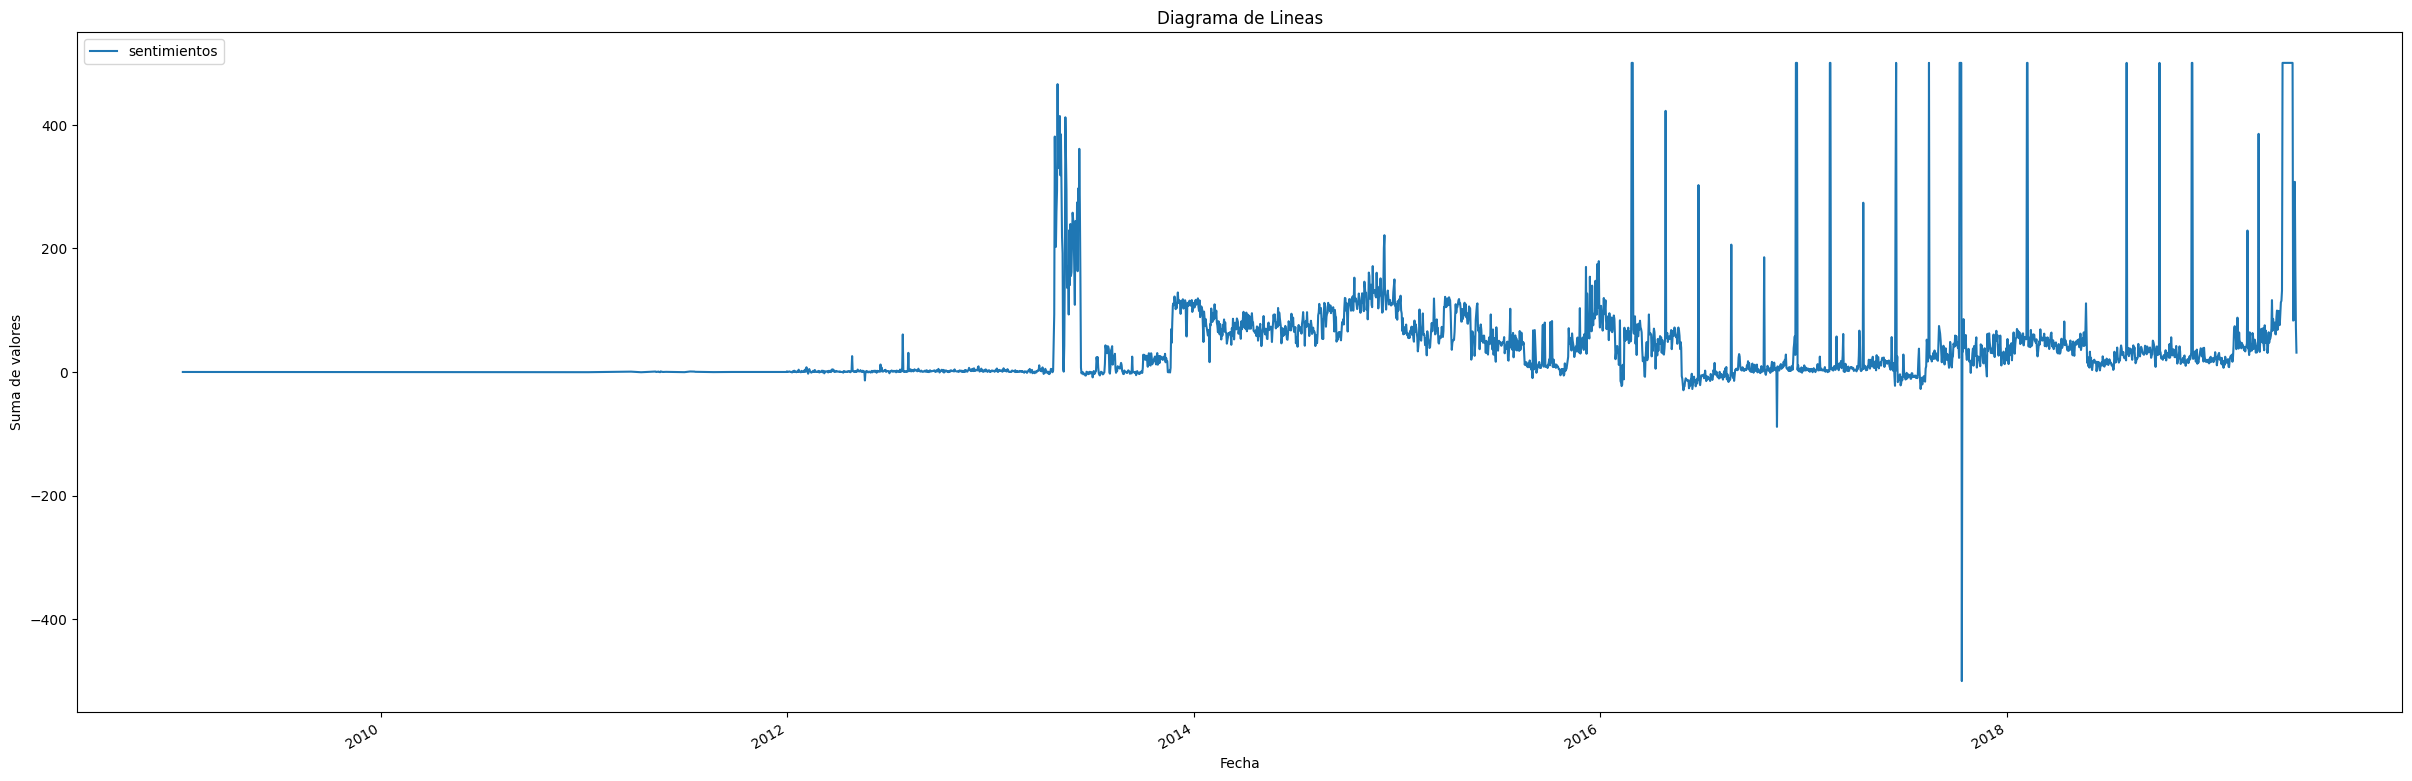

In [190]:
dfgrafico = dfdiario.clip(upper=500, lower=-500)
dfgrafico.plot(kind='line', title='Diagrama de Lineas', xlabel='Fecha', ylabel='Suma de valores', figsize=(30,10))

<AxesSubplot: title={'center': 'Diagrama de Barras Horizontales'}, xlabel='Fecha', ylabel='Suma de valores'>

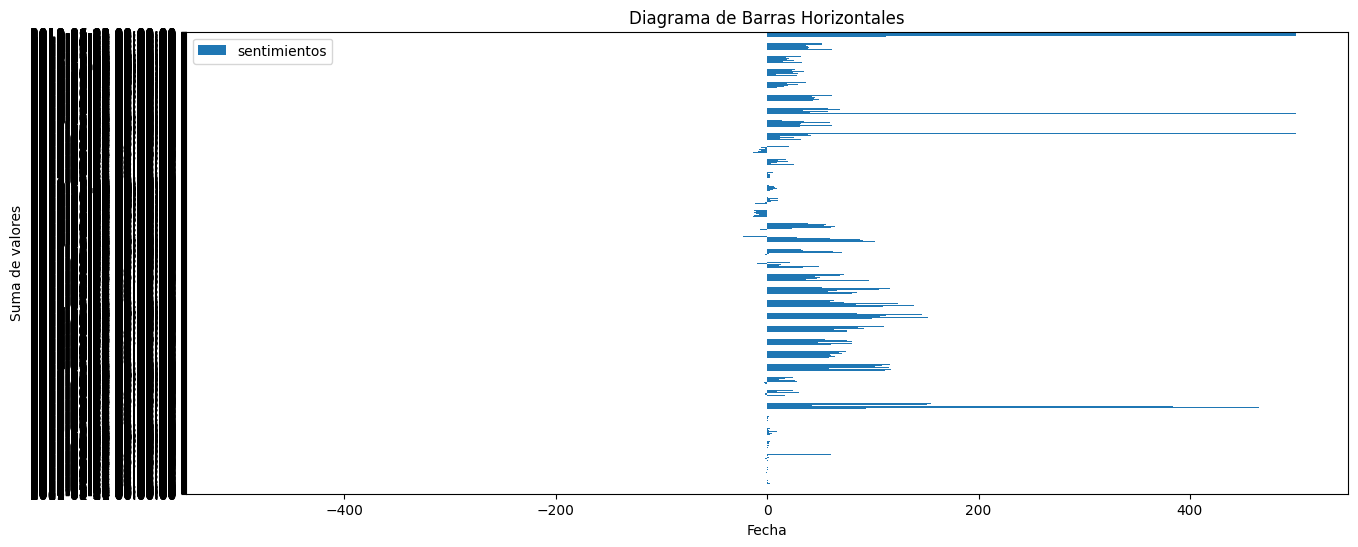

In [193]:
dfgrafico.plot(kind='barh', title='Diagrama de Barras Horizontales', xlabel='Fecha', ylabel='Suma de valores', figsize=(15,6))

<AxesSubplot: title={'center': 'Diagrama de Cajas'}, xlabel='Fecha', ylabel='Suma de valores'>

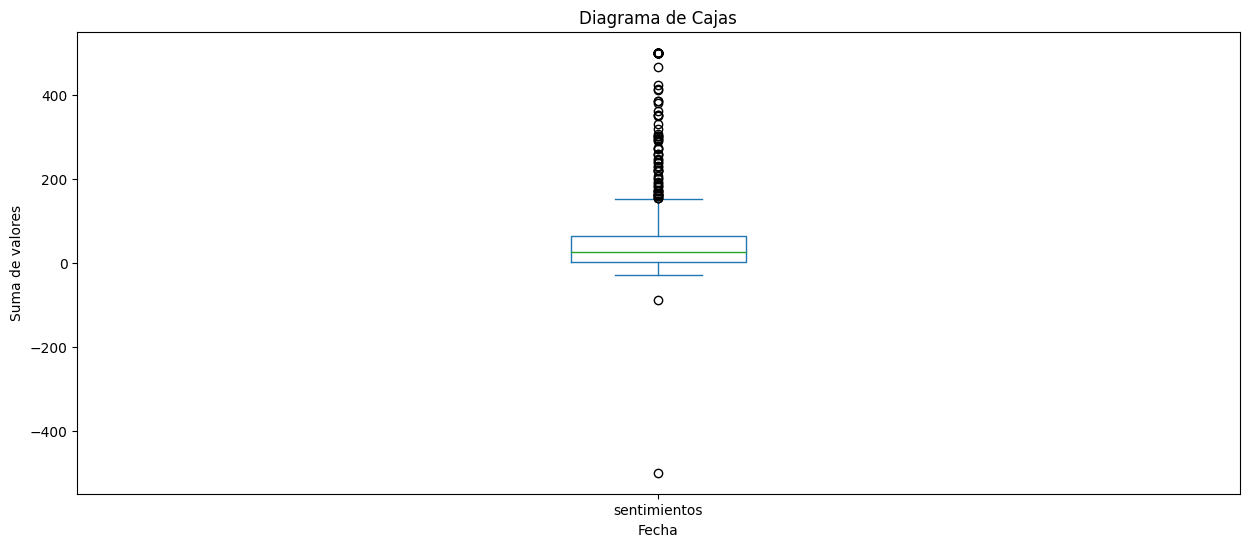

In [194]:
dfgrafico.plot(kind='box', title='Diagrama de Cajas', xlabel='Fecha', ylabel='Suma de valores', figsize=(15,6))

#### GRAFICO POR MES

<AxesSubplot: title={'center': 'Diagrama de Lineas'}, xlabel='Fecha', ylabel='Suma de valores'>

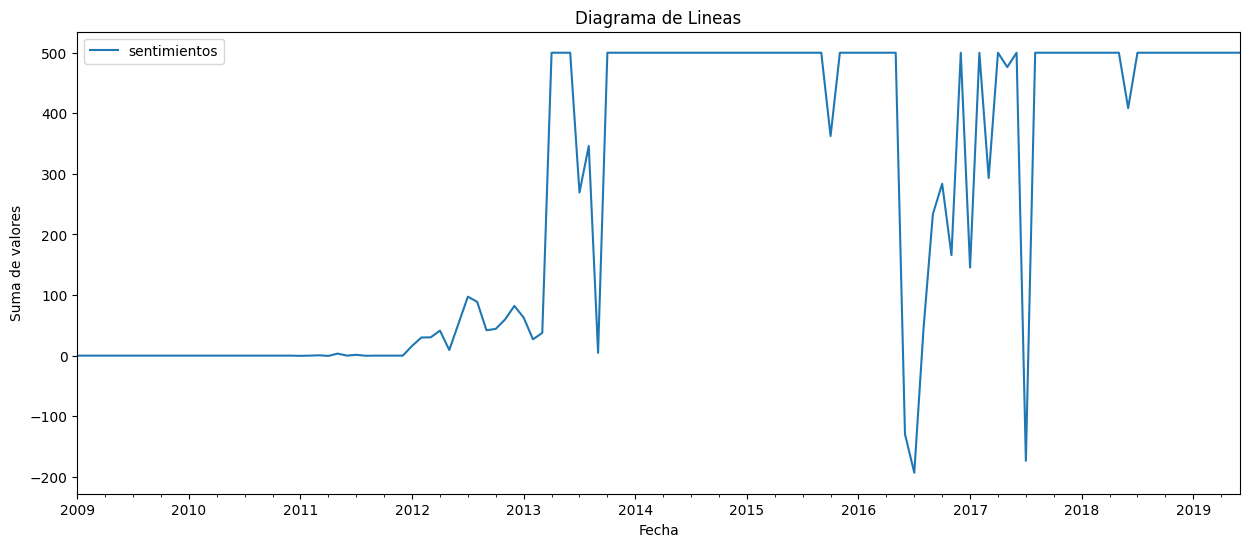

In [195]:
dfgraficomes = dfmes.clip(upper=500, lower=-500)
dfgraficomes.plot(kind='line', title='Diagrama de Lineas', xlabel='Fecha', ylabel='Suma de valores', figsize=(15,6))

<AxesSubplot: title={'center': 'Diagrama de Cajas'}, xlabel='Fecha', ylabel='Suma de valores'>

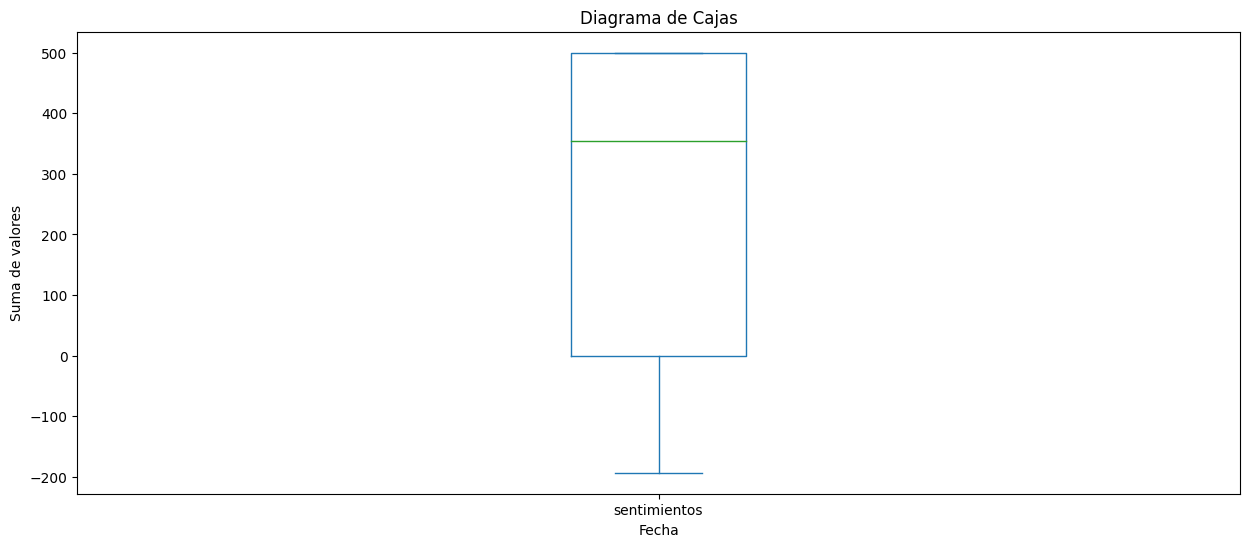

In [196]:
dfgraficomes.plot(kind='box', title='Diagrama de Cajas', xlabel='Fecha', ylabel='Suma de valores', figsize=(15,6))

<h2 style="font-size: 19px;color:#6DA0FF;font-family:Georgia, Times, 'Times New Roman', serif;letter-spacing: 3px;font-weight: normal">BTC CmC Price</h2>

In [197]:
# Tratamiento de datos
# ==============================================================================
from cryptocmd import CmcScraper
import numpy as np
import datetime
# Gráficos
# ==============================================================================
import plotly.graph_objects as go

In [198]:
# Descarga de datos
# ==============================================================================

# Se inicializa el Scraper, se incluye simbolo, inicio y fin de la descarga
scraper = CmcScraper('BTC', '28-04-2016', '30-07-2019')

# Transformar datos recogidos en un dataframe
data = scraper.get_dataframe()
data.sort_values(by='Date', ascending=True, inplace=True)

In [199]:
# Preparación del dato
# ==============================================================================
data['date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d %H:%M:%S')
data = data.loc[:, ['date', 'Open', 'Close', 'High', 'Low']]
data = data.rename({'Open': 'open', 'Close': 'close', 'High': 'high', 'Low': 'low'}, 
                    axis=1)
data = data.set_index('date')
data = data.asfreq('D')
data = data.sort_index()

In [200]:
# Dict con la info de los halvings del Bitcoin
# ==============================================================================
btc_halving = {'halving'              : [0, 1 , 2, 3, 4],
               'date'                 : ['2009-01-03', '2012-11-28', 
                                         '2016-07-09', '2020-05-11', np.nan],
               'reward'               : [50, 25, 12.5, 6.25, 3.125],
               'halving_block_number' : [0, 210000, 420000 ,630000, 840000]
              }

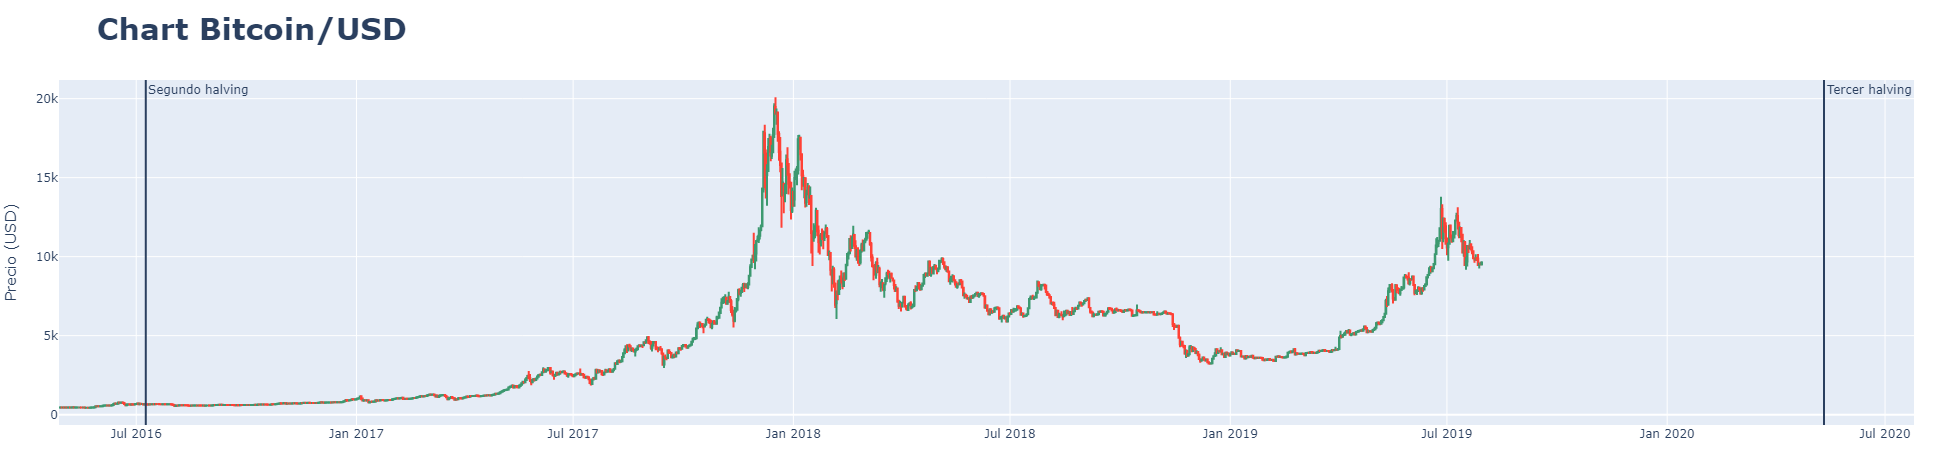

In [201]:
# Gráfico de velas japonesas interactivo con Plotly
# ==============================================================================
candlestick = go.Candlestick(
                    x     = data.index,
                    open  = data.open,
                    close = data.close,
                    low   = data.low,
                    high  = data.high,
                    )

fig = go.Figure(data=[candlestick])

fig.update_layout(
    width       = 900,
    height      = 450,
    title       = dict(text='<b>Chart Bitcoin/USD</b>', font=dict(size=30)),
    yaxis_title = dict(text='Precio (USD)', font=dict(size=15)),
    margin      = dict(l=10, r=20, t=80, b=20),
    shapes      = [dict(x0=btc_halving['date'][2], x1=btc_halving['date'][2], 
                        y0=0, y1=1, xref='x', yref='paper', line_width=2),
                   dict(x0=btc_halving['date'][3], x1=btc_halving['date'][3], 
                        y0=0, y1=1, xref='x', yref='paper', line_width=2)
                  ],
    annotations = [dict(x=btc_halving['date'][2], y=1, xref='x', yref='paper',
                      showarrow=False, xanchor='left', text='Segundo halving'),
                   dict(x=btc_halving['date'][3], y=1, xref='x', yref='paper',
                      showarrow=False, xanchor='left', text='Tercer halving')
                  ],
    xaxis_rangeslider_visible = False,
)

fig.show()

por quartiles en vez de barras y lineas

ademas organizar el date por mes y año en vez de x dia

retocar el modelo predictivo para subirle en la entrega